In [12]:
 #Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [13]:
#loading dataset
housing_data=pd.read_csv("Housing.csv")

In [14]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                       'airconditioning', 'prefarea', 'furnishingstatus']

for col in categorical_columns:
    le = LabelEncoder()
    housing_data[col] = le.fit_transform(housing_data[col])
    label_encoders[col] = le


In [15]:
# Define features and target variable
X = housing_data.drop(columns=['price'])
y = housing_data['price']

In [16]:
# Standardize numerical features
scaler = StandardScaler()
X[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']] = scaler.fit_transform(
    X[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
)

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
# Make predictions
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


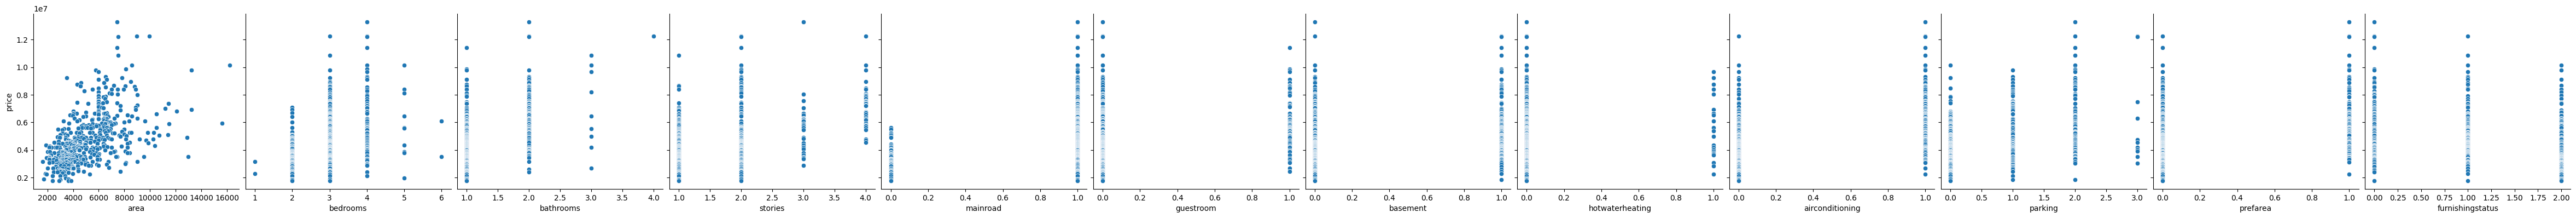

In [20]:
#to plot all the scatterplots in a single plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(housing_data, x_vars=['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus'], y_vars = 'price', size = 4, kind = 'scatter' )
plt.show()

In [21]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np


In [22]:
#Separate the features for linear regression
X_linear = housing_data[['area']]
y_linear = housing_data['price']


In [23]:
# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_linear, y_linear)
y_linear_pred = linear_model.predict(X_linear)

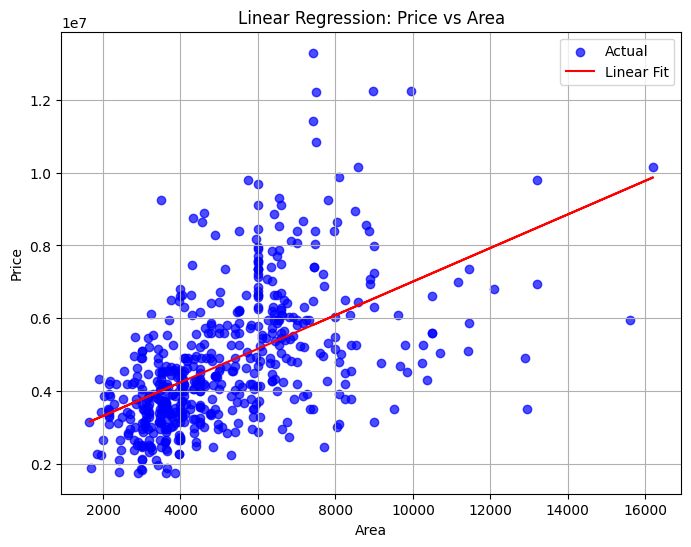

In [24]:
# Scatter plot for price vs area
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(housing_data['area'], housing_data['price'], alpha=0.7, color="blue", label="Actual")
plt.plot(housing_data['area'], y_linear_pred, color="red", label="Linear Fit")
plt.title("Linear Regression: Price vs Area")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

In [25]:
# Prepare data for logistic regression
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                       'airconditioning', 'prefarea', 'furnishingstatus']

X_logistic = housing_data[categorical_columns]
y_logistic = (housing_data['price'] > housing_data['price'].median()).astype(int)  # Binary classification

In [26]:
# Train a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_logistic, y_logistic)
y_logistic_pred = logistic_model.predict(X_logistic)


In [27]:
# Train a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_logistic, y_logistic)
y_logistic_pred = logistic_model.predict(X_logistic)


In [28]:
# Predict probabilities for logistic regression
y_logistic_proba = logistic_model.predict_proba(X_logistic)[:, 1]  # Probability of class 1

In [29]:
# Select a single feature to plot probabilities against
feature_to_plot = 'airconditioning'
feature_values = X_logistic[feature_to_plot]


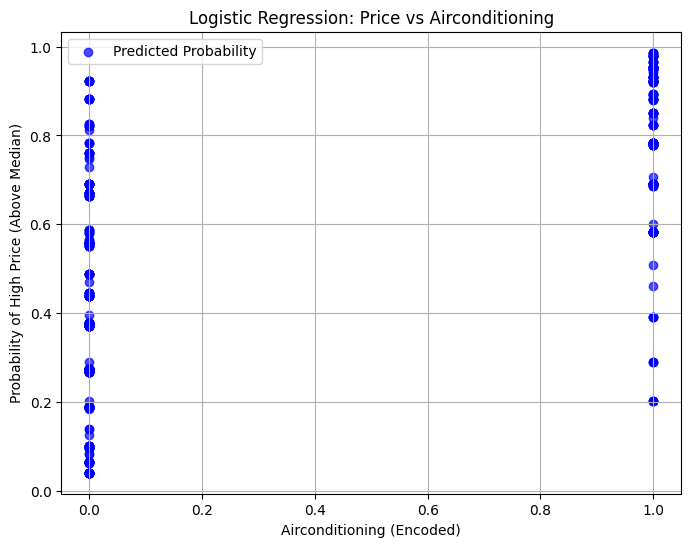

In [30]:
 #Plot logistic regression probabilities
plt.figure(figsize=(8, 6))
plt.scatter(feature_values, y_logistic_proba, alpha=0.7, color="blue", label="Predicted Probability")
plt.title(f"Logistic Regression: Price vs {feature_to_plot.capitalize()}")
plt.xlabel(f"{feature_to_plot.capitalize()} (Encoded)")
plt.ylabel("Probability of High Price (Above Median)")
plt.grid()
plt.legend()
plt.show()

In [31]:
# Accuracy for logistic regression
logistic_accuracy = accuracy_score(y_logistic, y_logistic_pred)
print(f"Logistic Regression Accuracy: {logistic_accuracy:.2f}")

Logistic Regression Accuracy: 0.76


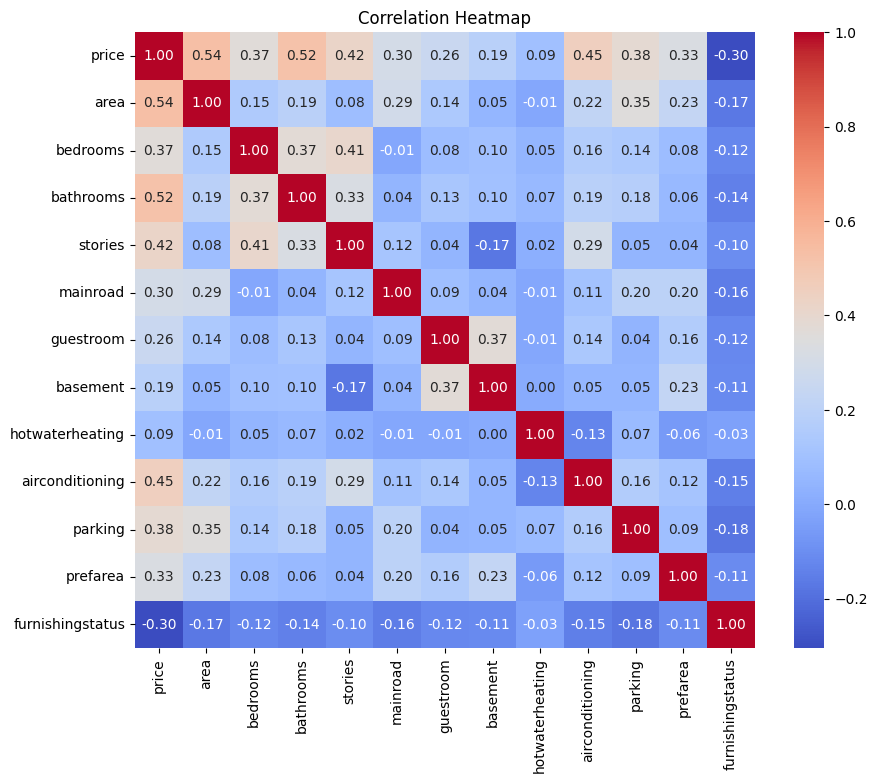

In [32]:
 #Plot heatmap of correlations
import seaborn as sns
plt.figure(figsize=(10, 8))
correlation_matrix = housing_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [33]:
# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print("Model Performance Metrics:")
print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Model Performance Metrics:
R-squared (R²): 0.61
Mean Squared Error (MSE): 1971419416624.47
Mean Absolute Error (MAE): 1024266.50
